<a href="https://colab.research.google.com/github/julieisok/OurFisrtML/blob/master/5_%EC%8B%A4%EC%A0%841_%EC%A3%BC%EC%8B%9D%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제

- 주식 데이터 획득하기
- 주식 데이터 준비하기
- 특정 종목에 대한 평균이동선을 파생변수(종속변수)로 획득하여 데이터 추가 
  - 5ma, 20ma, 60ma, 120ma 등 구현
- 선형그래프를 통해서 시각화 처리 
- 데드크로스, 골든크로스 지점을 확인

#주식 데이터 획득

- yahoo로 부터 구해올 예정
- daum, naver에서는 웹 스크래핑을 통해서 획득해야 함 
- 주식 데이터는 시계열 데이터이다 (과거의 정보가 현재에 영향을 미친다)

In [0]:
import pandas_datareader.data as web
import datetime

In [5]:
# 조회한 시간 정보 
start_day = datetime.datetime(2016,1,5) 
end_day   = datetime.datetime(2020,2,18)
start_day, end_day

(datetime.datetime(2016, 1, 5, 0, 0), datetime.datetime(2020, 2, 18, 0, 0))

In [7]:
# '035420.KS' : 종목코드.KS , 네이버 종목 코드
naver_trade_his = web.DataReader('035420.KS', 'yahoo', start_day, end_day )
naver_trade_his.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-05,128400.0,126200.0,126600.0,127400.0,347280.0,125089.671875
2016-01-06,129000.0,124400.0,129000.0,124600.0,478410.0,122340.445312


In [8]:
naver_trade_his.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-18,188500.0,185500.0,186500.0,186500.0,345642.0,186500.0
2020-02-19,191000.0,185000.0,188000.0,189500.0,491818.0,189500.0


In [9]:
naver_trade_his.shape

(971, 6)

In [10]:
# Adj Close => 평균이동선을 계산한다 
naver_trade_his.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2016-01-05 to 2020-02-19
Data columns (total 6 columns):
High         971 non-null float64
Low          971 non-null float64
Open         971 non-null float64
Close        971 non-null float64
Volume       971 non-null float64
Adj Close    971 non-null float64
dtypes: float64(6)
memory usage: 53.1 KB


In [0]:
tmp = web.DataReader('035420.KS', 'yahoo')

In [12]:
tmp.shape

(2460, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


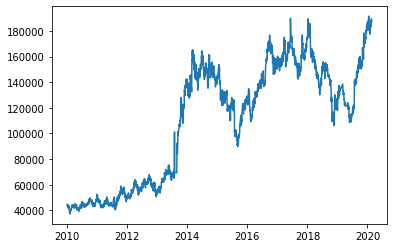

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( tmp[ tmp.columns[-1] ] ) 
plt.show()

In [14]:
naver_trade_his.shape

(971, 6)

# 주식 데이터 준비

In [0]:
# 데이터가 시계열이므로, 각 데이터중에 결측칙 있는지 검토 
# 단지, NaN 뿐만 아니라 0인 부분을 검토해야함 

In [21]:
# 정상적인 데이터의 총 개수 
naver_trade_his[ naver_trade_his['Volume'] != 0 ].shape 

(967, 7)

In [22]:
# 4개의 결측치가 발생했다는 걸 알수 있음 
naver_trade_his[ naver_trade_his['Volume'] == 0 ]

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2017-09-26,150800.0,150800.0,150800.0,150800.0,0.0,149157.921875,151294.403125
2018-10-08,140800.0,140800.0,140800.0,140800.0,0.0,140428.484375,139830.065625
2018-10-10,140800.0,140800.0,140800.0,140800.0,0.0,140428.484375,139471.015625
2018-10-11,140800.0,140800.0,140800.0,140800.0,0.0,140428.484375,140069.434375


In [0]:
# 최종 데이터는 : 결측을 제외한 최종 데이터만 다시 넣는다 
new_naver_trade_his = naver_trade_his[ naver_trade_his['Volume'] != 0 ]


# 평균 이동선 데이터 추가

In [0]:
# Adj Close 컬럼의 데이터를 이용하여 이동평균값을 구한다
# 해당값을 파생변수(종속변수)를 추가하여 처리 
# 5MA는 5일치 주가의 평균을 5일차 되는데 첫번째 데이터를 설정
# 이후는 하루씩 이동해 가면서 5MA값을 만들어간다 
# 1-4일차 까지는 값이 없다 

new_naver_trade_his['MA5'] = new_naver_trade_his['Adj Close'].rolling(window=5).mean()

In [26]:
new_naver_trade_his.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2020-02-13,185000.0,183000.0,184000.0,184500.0,555923.0,184500.0,184500.0
2020-02-14,187500.0,184000.0,184000.0,186500.0,659429.0,186500.0,184800.0
2020-02-17,189000.0,184500.0,184500.0,188500.0,312407.0,188500.0,185800.0
2020-02-18,188500.0,185500.0,186500.0,186500.0,345642.0,186500.0,186200.0
2020-02-19,191000.0,185000.0,188000.0,189500.0,491818.0,189500.0,187100.0


In [0]:
new_naver_trade_his['MA20'] = new_naver_trade_his['Adj Close'].rolling(window=20).mean()
new_naver_trade_his['MA60'] = new_naver_trade_his['Adj Close'].rolling(window=60).mean()
new_naver_trade_his['MA120'] = new_naver_trade_his['Adj Close'].rolling(window=120).mean()

In [28]:
new_naver_trade_his.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2020-02-13,185000.0,183000.0,184000.0,184500.0,555923.0,184500.0,184500.0,183700.0,179825.000000,166879.166667
2020-02-14,187500.0,184000.0,184000.0,186500.0,659429.0,186500.0,184800.0,183450.0,180041.666667,167270.833333
2020-02-17,189000.0,184500.0,184500.0,188500.0,312407.0,188500.0,185800.0,183300.0,180208.333333,167683.333333
2020-02-18,188500.0,185500.0,186500.0,186500.0,345642.0,186500.0,186200.0,183075.0,180475.000000,168025.000000
2020-02-19,191000.0,185000.0,188000.0,189500.0,491818.0,189500.0,187100.0,183175.0,180808.333333,168375.000000


# 시각화를 통한 차트 구현

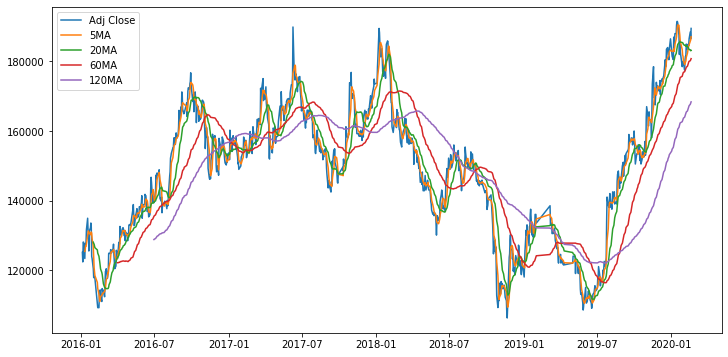

In [31]:
import matplotlib.pyplot as plt

x = new_naver_trade_his.index

plt.figure( figsize=(12, 6) )
plt.plot( x, new_naver_trade_his['Adj Close'], label ='Adj Close' )

plt.plot( x, new_naver_trade_his['MA5'], label='5MA' )
plt.plot( x, new_naver_trade_his['MA20'], label='20MA' )
plt.plot( x, new_naver_trade_his['MA60'], label='60MA' )
plt.plot( x, new_naver_trade_his['MA120'], label='120MA' )

plt.legend(loc='best')
plt.show()


# 시계열 데이터 분석 

- RNN + LSTM을 분석하는 것이 일반적(딥러닝) 
- 써드파트 라이브러리를 활용
 - fbprophet 
    - 페이스북에서 개발한 시계열 예측 패키지 
    - 경험적 규칙을 사용하는 단순 회귀모형이다 
    - 단기 예측에는 사용할만 하다 
    - 처리속도가 빠르다 
    - 설치 
      - ! pip install fbprophet

In [32]:
! pip install fbprophet

In [40]:
# 통계적 지식이 없어도 시계열 분석을 하고, 수치 조정(하이퍼파라미터) 조정을 통해서 모형을 조절할 수 있다 
from fbprophet import Prophet

naver_trade_his.tail(2)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-18,188500.0,185500.0,186500.0,186500.0,345642.0,186500.0
2020-02-19,191000.0,185000.0,188000.0,189500.0,491818.0,189500.0


In [42]:
# 원본 데이터를 두고, 예측을 위해 특정 시간 이전까지의 데이터로 
# 학습 후 예측을 수행하여 결과를 확인 

pred_naver = naver_trade_his[ :'2020-01-19']
pred_naver.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-16,192500.0,189000.0,190000.0,191500.0,245107.0,191500.0
2020-01-17,192500.0,189500.0,190500.0,191000.0,286019.0,191000.0


In [46]:
import pandas as pd 

# 학습을 위한 데이터 준비
# 형식은 정해져있다
dic = {
    'ds' : pred_naver.index, 
    'y' : pred_naver['Close']
}

df = pd.DataFrame( dic )
df.tail(2)

,ds,y
Date,,
2020-01-16,2020-01-16,191500.0
2020-01-17,2020-01-17,191000.0


In [47]:
# 인덱스 초기화
# inplace = True 원본 수정의 의미 
df.reset_index( inplace=True )
df.head(2)

,Date,ds,y
0,2016-01-05,2016-01-05,127400.0
1,2016-01-06,2016-01-06,124600.0


In [49]:
del df['Date']
df.head(2)

,ds,y
0,2016-01-05,127400.0
1,2016-01-06,124600.0


In [50]:
# 생성
# 주기성을 매개변수로 설정 -> 일단위  
m = Prophet( daily_seasonality=True )

# 학습
m.fit( df )

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [52]:
# 예측 : 2020-01-17 이후 2020-02-19
future = m.make_future_dataframe( periods=33 )
# future = m.make_future_dataframe( periods=365 )
future.tail(2) 


,ds
977,2020-02-18
978,2020-02-19


In [54]:
forcast = m.predict( future )
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
974,2020-02-15,193965.285577,171473.780730,192245.464118,193681.665514,194207.362282,-12361.592393,-12361.592393,-12361.592393,-10762.18923,-10762.18923,-10762.18923,1345.273660,1345.273660,1345.273660,-2944.676823,-2944.676823,-2944.676823,0.0,0.0,0.0,181603.693184
975,2020-02-16,194177.977146,170582.816062,191907.194737,193849.803675,194429.793889,-12647.032151,-12647.032151,-12647.032151,-10762.18923,-10762.18923,-10762.18923,1345.273646,1345.273646,1345.273646,-3230.116566,-3230.116566,-3230.116566,0.0,0.0,0.0,181530.944995
976,2020-02-17,194390.668715,169613.109039,189337.871757,194024.972608,194661.685957,-14720.749117,-14720.749117,-14720.749117,-10762.18923,-10762.18923,-10762.18923,-513.377505,-513.377505,-513.377505,-3445.182382,-3445.182382,-3445.182382,0.0,0.0,0.0,179669.919598
977,2020-02-18,194603.360285,168877.042651,190154.291451,194220.620487,194901.502061,-14949.874670,-14949.874670,-14949.874670,-10762.18923,-10762.18923,-10762.18923,-596.492603,-596.492603,-596.492603,-3591.192837,-3591.192837,-3591.192837,0.0,0.0,0.0,179653.485615
978,2020-02-19,194816.051854,169656.064901,189259.717426,194414.887800,195146.278733,-15357.095811,-15357.095811,-15357.095811,-10762.18923,-10762.18923,-10762.18923,-924.775640,-924.775640,-924.775640,-3670.130941,-3670.130941,-3670.130941,0.0,0.0,0.0,179458.956043


In [56]:
# 필요한것만 사용

forcast[ ['ds', 'yhat', 'yhat_lower','yhat_upper' ] ].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-05,120438.624994,109638.153524,131258.302542
1,2016-01-06,120932.382421,111246.513726,131669.210662
2,2016-01-07,122282.953424,112032.048516,131794.034698
3,2016-01-08,123295.203362,112661.018265,133291.316735
4,2016-01-11,125490.235483,115584.741645,136781.267206


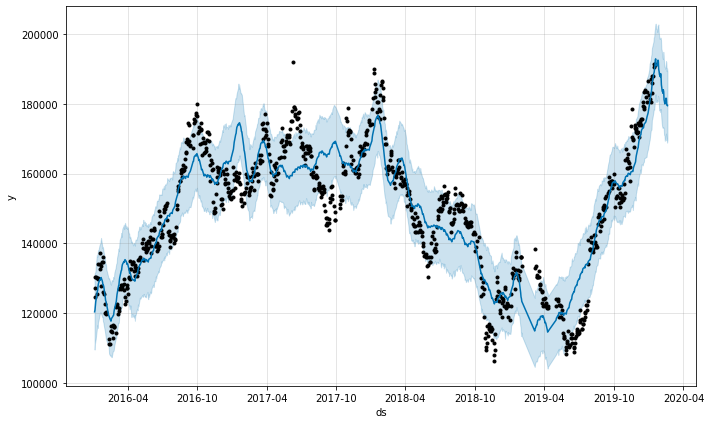

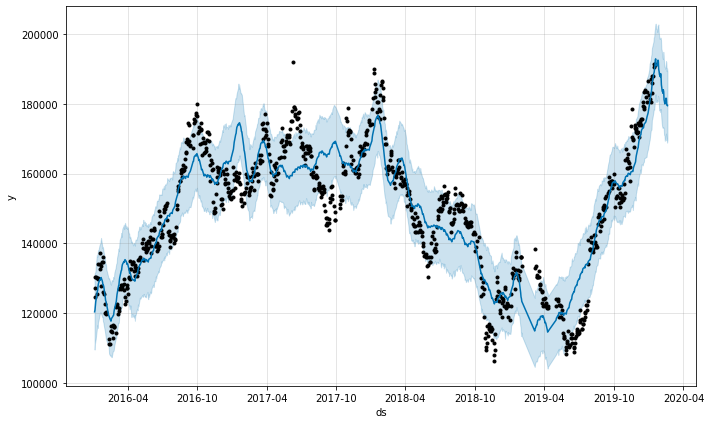

In [57]:
m.plot( forcast )

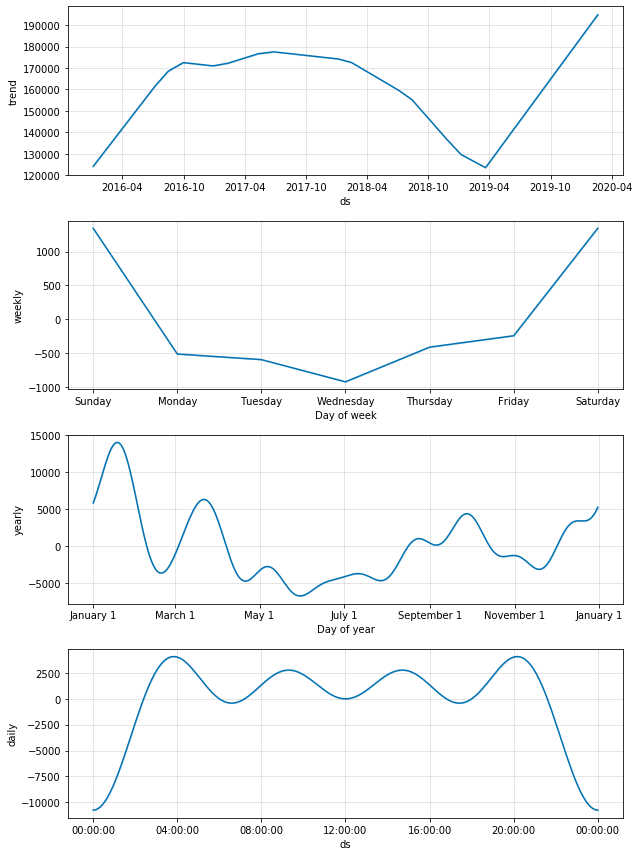

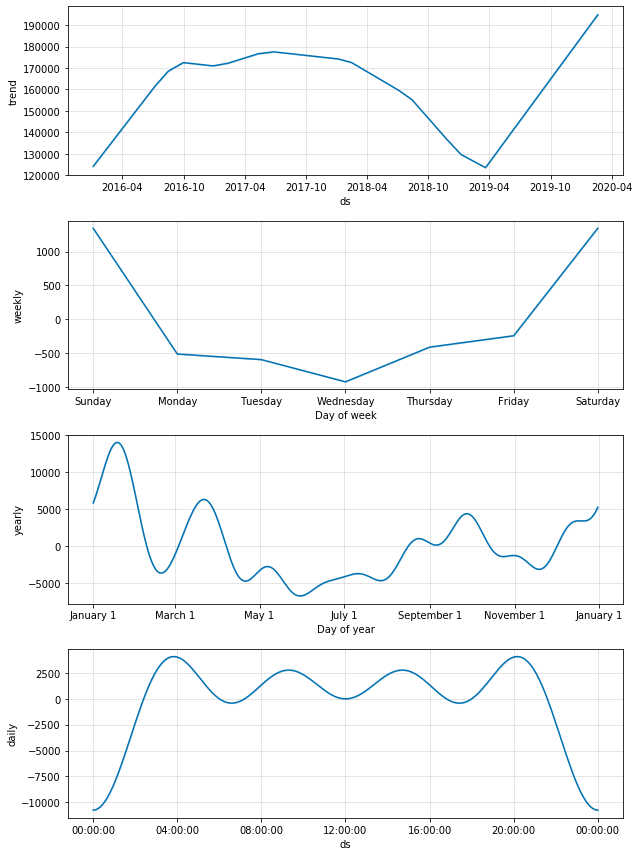

In [58]:
m.plot_components( forcast )